                                    Sobre o conjunto de dados
Mergulhe no conjunto de dados de traços de personalidade extrovertidos vs introvertidos, uma rica coleção de dados comportamentais e sociais projetadas
para explorar o espectro da personalidade humana. Este conjunto de dados captura
indicadores-chave de extroversão e introversão, tornando-se um recurso valioso
para psicologos, cientistas de dados e pesquisadores que estudam comportamento
social, previsão de personalidade ou técnicas de pré-processamento de dados.

                                 Contexto
-> Traços de personalidade como extroversão e introversão moldam a forma como
os inidividuos interagem com seus ambientes sociais. Este conjunto de dados
fornece insights sobre comportamentos como tempo gasto sozinho, participação
em eventos sociais e engajamento em midias sociais, possibilitando aplicações
em psicologia, sociologia, marketing e aprendizado de máquina. Seja para prever
tipos de personalidade ou análisar padrões sociais, este conjunto de dados é sua
porta de entrada para descobrir insights fascinantes.

Tamanho: O conjunto de dados contém 2.900 linhas e 8 colunas

Import das bibliotecas necessárias

In [1]:
# Biblioteca que irá permitir acessar e manipular os dados de um dataset
import pandas as pd

# Biblioteca que irá permitir a construção de vários tipos de dados
import seaborn as sns

# Biblioteca que permite criar e manipular gráficos (como o seu titulo,
# o seu tamanho, etc)
import matplotlib.pyplot as plt

Acessando o dataset com o pandas

In [2]:
base_de_dados = pd.read_csv('personality_dataset.csv')

Verificando as colunas do dataset

In [3]:
base_de_dados.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


Vamos renomear as colunas com o objetivo de facilitar a nossa análise e compreensão dos dados

In [4]:
base_de_dados.rename(columns={
    
    'Time_spent_Alone':'Tempo_passado_sozinho',
    
    # Podemos associar essa coluna ao medo de falar ou se apresentar
    # em público
    'Stage_fear':'Medo_de_palco',
    
    'Social_event_attendance': 'Frequência_de_participacao_em_eventos_sociais',
    
    # Acho que podemos considerar essa coluna como frequência que o candidato sai de casa.
    'Going_outside': 'Frequencia_que_sai_de_casa',
    
    'Drained_after_socializing': 'Se_sente_esgotado_apos_socializar',
    
    'Friends_circle_size': 'Tamanho_do_circulo_de_amigos',
    
    'Post_frequency':'Frequencia_que_realiza_postagens',
    
    'Personality': 'Personalidade'
    
    
    
}, inplace=True)

Verificando se os nomes das colunas foram alterados

In [5]:
base_de_dados.columns

Index(['Tempo_passado_sozinho', 'Medo_de_palco',
       'Frequência_de_participacao_em_eventos_sociais',
       'Frequencia_que_sai_de_casa', 'Se_sente_esgotado_apos_socializar',
       'Tamanho_do_circulo_de_amigos', 'Frequencia_que_realiza_postagens',
       'Personalidade'],
      dtype='object')

Verificando as informações gerais do dataset

In [6]:
base_de_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Tempo_passado_sozinho                          2837 non-null   float64
 1   Medo_de_palco                                  2827 non-null   object 
 2   Frequência_de_participacao_em_eventos_sociais  2838 non-null   float64
 3   Frequencia_que_sai_de_casa                     2834 non-null   float64
 4   Se_sente_esgotado_apos_socializar              2848 non-null   object 
 5   Tamanho_do_circulo_de_amigos                   2823 non-null   float64
 6   Frequencia_que_realiza_postagens               2835 non-null   float64
 7   Personalidade                                  2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Podemos observar que até o momento não será necessário converter os tipos dos dados

Verificando o total de valores nulos em cada coluna

In [7]:
base_de_dados.isnull().sum()

Tempo_passado_sozinho                            63
Medo_de_palco                                    73
Frequência_de_participacao_em_eventos_sociais    62
Frequencia_que_sai_de_casa                       66
Se_sente_esgotado_apos_socializar                52
Tamanho_do_circulo_de_amigos                     77
Frequencia_que_realiza_postagens                 65
Personalidade                                     0
dtype: int64

Vamos eliminar do dataset, os valores nulos das colunas

In [8]:
base_de_dados = base_de_dados.dropna()

Verificando se os valores nulos foram excluidos

In [9]:
base_de_dados.isnull().sum()

Tempo_passado_sozinho                            0
Medo_de_palco                                    0
Frequência_de_participacao_em_eventos_sociais    0
Frequencia_que_sai_de_casa                       0
Se_sente_esgotado_apos_socializar                0
Tamanho_do_circulo_de_amigos                     0
Frequencia_que_realiza_postagens                 0
Personalidade                                    0
dtype: int64

Agora podemos observar pelo info, que o dataset ficou apenas com as 2477 linhas (que não são nulas)

In [10]:
base_de_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Tempo_passado_sozinho                          2477 non-null   float64
 1   Medo_de_palco                                  2477 non-null   object 
 2   Frequência_de_participacao_em_eventos_sociais  2477 non-null   float64
 3   Frequencia_que_sai_de_casa                     2477 non-null   float64
 4   Se_sente_esgotado_apos_socializar              2477 non-null   object 
 5   Tamanho_do_circulo_de_amigos                   2477 non-null   float64
 6   Frequencia_que_realiza_postagens               2477 non-null   float64
 7   Personalidade                                  2477 non-null   object 
dtypes: float64(5), object(3)
memory usage: 174.2+ KB


Qual a distribuição dos tipos de personalidade no dataset?

Primeiro, vamos verificar a distribuição usando o método do pandas value_counts que irá contar a quantidade de cada valor único da coluna.

In [11]:
base_de_dados['Personalidade'].value_counts()

Personalidade
Extrovert    1274
Introvert    1203
Name: count, dtype: int64

Também podemos verificar essa distribuição através de um gráfico de barras

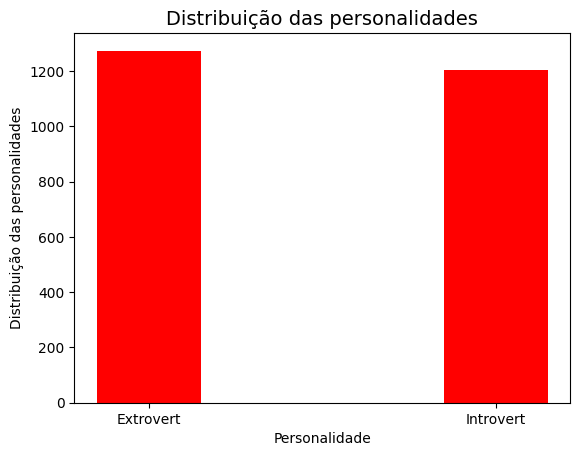

In [12]:
# Irá definir o titulo do gráfico alinhado ao centro com o tamanho da
# fonte 14.
plt.title("Distribuição das personalidades", loc='center', fontsize=14)

# Vamos criar uma variável que irá receber a quantidade de valores unicos
# da coluna de personalidade.
base_de_dados_personalidade = base_de_dados['Personalidade'].value_counts()

# Ira definir o titulo do eixo x
plt.xlabel('Personalidade')

# Irá definir o titulo do eixo y
plt.ylabel('Distribuição das personalidades')

# Irá construir o gráfico de barras com a distribuição das personalidades.
# base_de_dados_personalidade.index: Irá atribuir ao eixo x o indice dos
# (nome) dos valores unicos.
# base_de_dados_personalidade.values: Irá atribuir ao eixo y os valores
# (quantidade/frequencia dos valores únicos) da coluna análisada.
# color: Irá definir a cor das barras.
# width: Irá definir a largura das barras. O width recebe valores entre 0 e 1 onde quanto mais próximo do 1, maior a espessura do gráfico.
plt.bar(base_de_dados_personalidade.index, base_de_dados_personalidade.values, color='red', width=0.30)

# Ira exibir o gráfico de barras
plt.show()

Conclusão: Podemos observar que há mais pessoas extrovertidas do que introvertidas.

Quantas pessoas dizem sentir-se "esgotado" após uma conversa e quantas não?

In [13]:
base_de_dados['Se_sente_esgotado_apos_socializar'].value_counts()

Se_sente_esgotado_apos_socializar
No     1241
Yes    1236
Name: count, dtype: int64

Quantidade de pessoas extrovertidas e introvertidas que se sentem esgotadas após a socialização

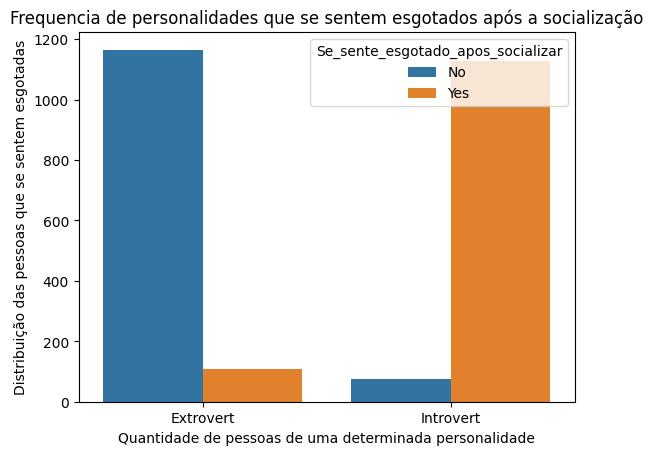

In [14]:
# Ira definir o Titulo do gráfico alinhado ao centro 
plt.title('Frequencia de personalidades que se sentem esgotados após a socialização', loc='center')

# Ira definir o titulo do eixo x
plt.xlabel("Quantidade de pessoas de uma determinada personalidade")

# Irá definir o titulo do eixo y
plt.ylabel("Distribuição das pessoas que se sentem esgotadas")

# Gráfico countplot: gráfico da biblioteca seaborn projetada especificamente
# para mostrar a contagem de observações em cada categoria de uma variável
# categórica. Dessa maneira, poderemos verificar a distribuição de variáveis
# categóricas em outras variáveis categóricas.
# x: Eixo x do gráfico que irá conter a coluna categórica (Personalidade no
# nosso caso).
# hue: Irá conter a segunda coluna categórica que será usada para agrupar (colorir) as barras da coluna 'x' (a coluna Se_sente_esgotado_apos_socializar no nosso caso, que contém valores como 'Sim' ou 'Não').
# data: Ira conter a base de dados análisada.
sns.countplot(x='Personalidade', hue='Se_sente_esgotado_apos_socializar', data=base_de_dados)

# Ira exibir o gráfico
plt.show()

                            Conclusão do gráfico

-> Podemos observar que que o numero de extrovertidos que se sentem esgotados é menor que o numero de extrovertidos que não se sentem esgotados. Isso talvez
ocorra por que as pessoas extrovertidas tendem a socializar mais e melhor.

-> O numero de introvertidos que se sentem esgotados é maior que o numero de introvertidos que não se sentem esgotados. Isso talvez ocorra por conta da dificuldade que os introvertidos tendem a ter ao se socializar.

-> O numero de extrovertidos que não se sentem esgotados é maior que o numero de introvertidos que não se sentem esgotados.

-> De modo geral (de acordo com o gráfico), os extrivertidos tendem a cansar menos durante a socialização

Construindo um boxplot para descobrir a relação entre as colunas de tempo gasto sozinho e a personalidade.

In [15]:
base_de_dados.columns

Index(['Tempo_passado_sozinho', 'Medo_de_palco',
       'Frequência_de_participacao_em_eventos_sociais',
       'Frequencia_que_sai_de_casa', 'Se_sente_esgotado_apos_socializar',
       'Tamanho_do_circulo_de_amigos', 'Frequencia_que_realiza_postagens',
       'Personalidade'],
      dtype='object')

Construção do boxplot das colunas 'Tempo_passado_sozinho' e 'Personalidade'

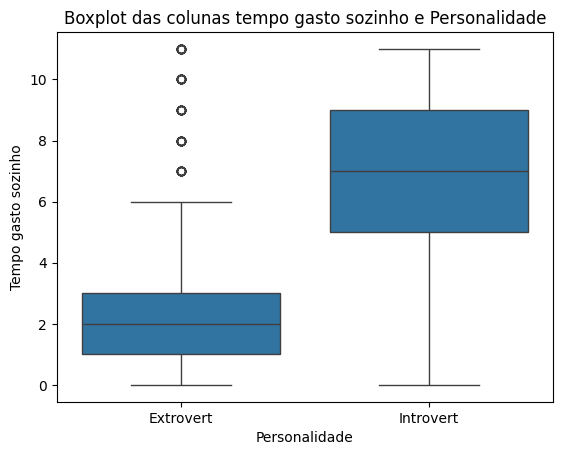

In [16]:
# Irá definir o titulo do gráfico boxplot
plt.title('Boxplot das colunas tempo gasto sozinho e Personalidade')

# Ira definir o rótulo do eixo X
plt.xlabel('Personalidade')

# Irá definir o rótulo do eixo y
plt.ylabel('Tempo gasto sozinho')

# Ira construir o gráfico boxplot, a função ira receber como parametro
# a base de dados análisada, o valor do eixo x (coluna de personalidades)
# e o valor do eixo y(coluna de tempo passado sozinho)
sns.boxplot(data=base_de_dados, x='Personalidade', y='Tempo_passado_sozinho')

# Ira exibir o gráfico
plt.show()

                            Conclusão do boxplot
-> Os boxplots possuem Como menor valor o 0 (pessoas que não passam nenhum tempo sozinhas)

-> O boxplot dos extrovertidos tem como maior valor o 6 (quantidade de minutos que os extrovertidos passam sozinhos).

-> O boxplot dos Introvertidos possuem como maior valor o 10 (quantidade de minutos que os introvertidos passam sozinho).

-> A mediana do tempo que os extrovertidos passam sozinho é 2 minutos (valor representado pela linha que fica localizada no centro do boxplot).A linha no centro representa a mediana (Q2 ou 50º percentil). A mediana é o valor que divide a amostra em duas metades iguais (50% dos dados estão abaixo dele e 50% acima). Para os extrovertidos, a mediana está realmente no valor 2.

-> Através do boxplot podemos relacionar que introvertidos tendem a passar mais tempo sozinhos que os extrovertidos 

Gráfico de dispersão (gráfico de pontos) entre o circulo de amizades e a frequencia de postagens

In [17]:
base_de_dados.columns

Index(['Tempo_passado_sozinho', 'Medo_de_palco',
       'Frequência_de_participacao_em_eventos_sociais',
       'Frequencia_que_sai_de_casa', 'Se_sente_esgotado_apos_socializar',
       'Tamanho_do_circulo_de_amigos', 'Frequencia_que_realiza_postagens',
       'Personalidade'],
      dtype='object')

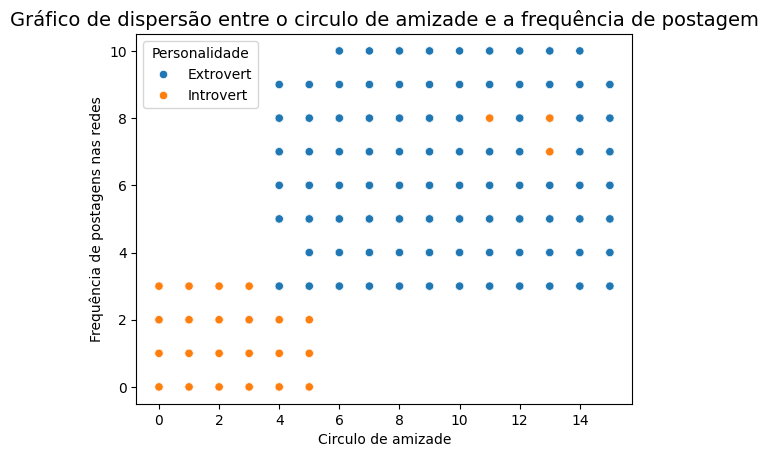

In [18]:
# Irá definir o titulo do gráfico alinhado ao centro e com tamanho de fonte 14
plt.title("Gráfico de dispersão entre o circulo de amizade e a frequência de postagem", loc='center', fontsize=14)

# Irá definir o titulo do eixo X
plt.xlabel("Circulo de amizade")

# Irá definir o titulo do eixo Y
plt.ylabel("Frequência de postagens nas redes")

# Função que irá criar o gráfico de pontos usando as colunas da base
# de dados. A função irá receber como argumentos a base de dados analisada,
# a coluna que ficara no eixo x, a coluna que ficara no eixo Y e o hue
# que irá identificar os valores da coluna categórica 'Personalidade' que
# tera como objetivo identificar os grupos de extrovertidos e introvertidos.
sns.scatterplot(data=base_de_dados, x='Tamanho_do_circulo_de_amigos', y='Frequencia_que_realiza_postagens', hue='Personalidade')

# Irá exibir o gráfico
plt.show()

                        Conclusão do gráfico scatterplot
-> Podemos perceber que a relação entre as variáveis está na tendência de  aumento da frequência de postagens dos usuários que possuem um grande circulo de amizades.

-> Podemos perceber que o circulo de amizades de extrovertidos é maior que o circulo de amizades de pessoas introvertidas. Isso talvez ocorra pela facilidade que os extrovertidos tem em se comunicar com as pessoas.

->Podemos perceber que há uma pequena parcela de introvertidos que possuem um grande circulo de amizade (os pontos que estão entre o 10 e o 14). Podemos considerar esses pontos como outliers (valores fora do padrão).

Verificando se existe alguma correlação entre as colunas de tempo que o candidato passa sozinho e o tamanho do seu circulo de amizades

In [19]:
base_de_dados.columns

Index(['Tempo_passado_sozinho', 'Medo_de_palco',
       'Frequência_de_participacao_em_eventos_sociais',
       'Frequencia_que_sai_de_casa', 'Se_sente_esgotado_apos_socializar',
       'Tamanho_do_circulo_de_amigos', 'Frequencia_que_realiza_postagens',
       'Personalidade'],
      dtype='object')

In [ ]:
# Variável que irá conter o método corr que calcula a correlação de
# 2 variáveis.
correlacao = base_de_dados['Tempo_passado_sozinho'].corr(base_de_dados['Tamanho_do_circulo_de_amigos'])

# Ira mostrar o resultado da correlação.
print(correlacao)

-0.7176493053525468


                                             Conclusão da correlação
->podemos perceber que é uma correlação linear negativa forte, ou seja, quanto maior o tempo passado sozinho, menor é o circulo de amigos 

A presença de medo de palco está associada a menor participação em eventos sociais? 

In [21]:
base_de_dados.columns

Index(['Tempo_passado_sozinho', 'Medo_de_palco',
       'Frequência_de_participacao_em_eventos_sociais',
       'Frequencia_que_sai_de_casa', 'Se_sente_esgotado_apos_socializar',
       'Tamanho_do_circulo_de_amigos', 'Frequencia_que_realiza_postagens',
       'Personalidade'],
      dtype='object')

In [23]:
base_de_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Tempo_passado_sozinho                          2477 non-null   float64
 1   Medo_de_palco                                  2477 non-null   object 
 2   Frequência_de_participacao_em_eventos_sociais  2477 non-null   float64
 3   Frequencia_que_sai_de_casa                     2477 non-null   float64
 4   Se_sente_esgotado_apos_socializar              2477 non-null   object 
 5   Tamanho_do_circulo_de_amigos                   2477 non-null   float64
 6   Frequencia_que_realiza_postagens               2477 non-null   float64
 7   Personalidade                                  2477 non-null   object 
dtypes: float64(5), object(3)
memory usage: 174.2+ KB


Para descobrir se há uma associação também utilizaremos o método de correlação, dessa maneira, iremos verificar se o aumento do medo diminui
a participação de eventos.

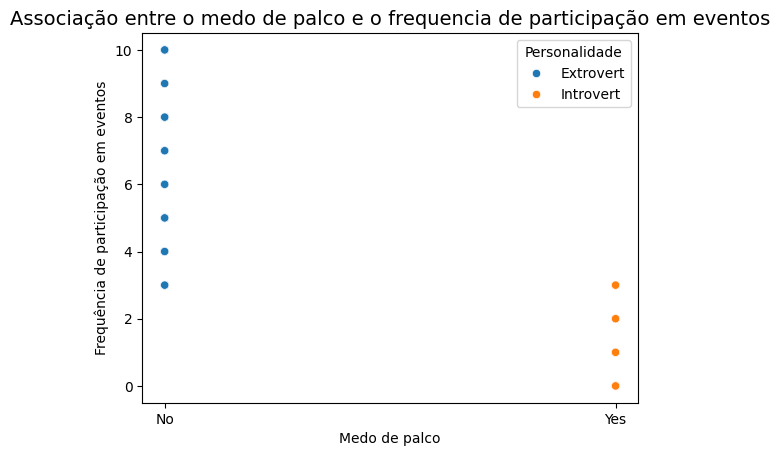

In [ ]:
# Irá definir o titulo do gráfico alinhado ao centro e com tamanho da fonte 14
plt.title('Associação entre o medo de palco e o frequencia de participação em eventos', loc='center', fontsize=14)

# Rótulo do eixo x do gráfico
plt.xlabel('Medo de palco')

# Rótulo do eixo y do gráfico
plt.ylabel("Frequência de participação em eventos")

# Função do seaborn que irá construir o gráfico de pontos scatterplot.
# A função irá receber como parâmetro a base de dados análisada, o valor
# do eixo x, o valor do eixo y e o hue que irá identificar a presença
# da variável categórica personalidade nas colunas análisadas (medo de palco e frequência de participação em eventos)
sns.scatterplot(data=base_de_dados, x='Medo_de_palco', y='Frequência_de_participacao_em_eventos_sociais', hue='Personalidade')

# Irá exibir o gráfico
plt.show()


                                Conclusão do scatterplot

-> Podemos concluir através do gráfico que o medo de palco está fortemente associada a frequencia de participação em eventos, pois, o grupo que possui
medo de palco participa muito pouco de eventos sociais.

-> O grupo que não possui medo de palco participa com mais frequencia dos eventos sociais.

-> Também podemos associar a baixa frequência de participação ao tipo da personalidade, já que individuos introvertidos tendem a participar menos
de eventos do que os extrovertidos 

Comparando a média da frequência esgotados e não esgotados que saem de casa

In [ ]:
# para realizar o cálculo vamos agrupar os dados pela coluna de pessoas que sentem esgotadas. Após agrupar os dados, vamos acessar a frequencia que os
# candidatos agrupados saem de casa, dessa maneira poderemos usar a função
# mean para calcular a média dos dois grupos ("yes" e "no")
media = base_de_dados.groupby('Se_sente_esgotado_apos_socializar')['Frequencia_que_sai_de_casa'].mean()

# Ira imprimir o resultado
print(media)

Se_sente_esgotado_apos_socializar
No     5.003223
Yes    1.016181
Name: Frequencia_que_sai_de_casa, dtype: float64


                                                     Conclusão da média
-> Podemos observar que, em média, as pessoas que não se sentem esgotadas 
saem mais que as pessoas que se sentem esgotadas. Podemos atribuir isso
ao esgotamento que o grupo "yes" sente ao se relacionar com as pessoas.